# **tabular-playground-series-aug-2022**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
train_df = pd.read_csv("../tabular-playground-series-aug-2022/train.csv")
test_df = pd.read_csv("../tabular-playground-series-aug-2022/test.csv")

In [4]:
print(train_df.shape)
print(test_df.shape)

(26570, 26)
(20775, 25)


In [5]:
display(train_df.head())
display(test_df.head())

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [6]:
measurement_cols = [i for i in train_df.columns if "measurement" in i]
measurement_int_cols = [i for i in measurement_cols if train_df[i].dtype == int]
measurement_float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
float_cols = [i for i in train_df.columns if train_df[i].dtype == float]
attribute_cols = [i for i in train_df.columns if "attribute" in i]

<AxesSubplot:xlabel='missing values', ylabel='column'>

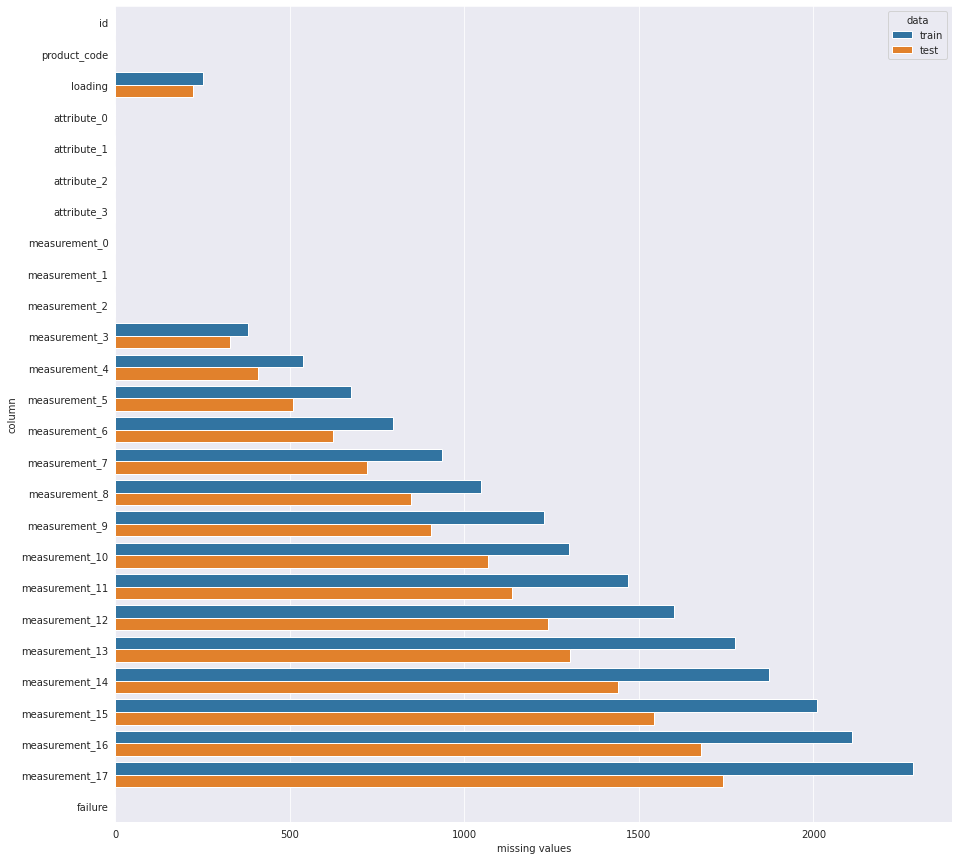

In [8]:
missing_values = pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=1)
missing_values = pd.concat([train_df.isna().sum(), test_df.isna().sum()], axis=0).rename("missing values").reset_index().rename(columns={"index":"column"})
missing_values["data"] = ["train"]*len(train_df.columns) + ["test"]*len(test_df.columns)
f, ax = plt.subplots(figsize=(15,15))
sns.barplot(data=missing_values, y="column", x="missing values", hue="data", orient="h")

In [9]:
def val_count_df(df, column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

In [10]:
def plot_and_display_valuecounts(df, column_name, sort_by_column_name):
    val_count = val_count_df(df, column_name, sort_by_column_name)
    display(val_count)
    
    val_count.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");
    
def plot_and_display_compare_valuecounts(df1, df2, column_name, sort_by_column_name):
    val_count_1 = val_count_df(df1, column_name, sort_by_column_name)
    val_count_1 = val_count_1.rename(columns={"Value Count":"train_value_count", "Percentage":"train_percentage"})
    val_count_2 = val_count_df(df2, column_name, sort_by_column_name)
    val_count_2 = val_count_2.rename(columns={"Value Count":"test_value_count", "Percentage":"test_percentage"})
    
    val_count = pd.merge(val_count_1, val_count_2, on=column_name, how="outer")
    display(val_count)
    
    val_count = val_count.drop(columns=["train_percentage", "test_percentage"])
    val_count.set_index(column_name).plot.pie(figsize=(12,7), legend=False, ylabel="", subplots=True, title=["Train","Test"])

,failure,Value Count,Percentage
0,0,20921,78.73918
1,1,5649,21.26082


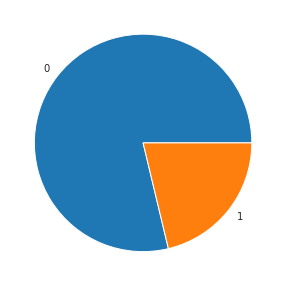

In [11]:
plot_and_display_valuecounts(train_df, "failure", False)

,product_code,train_value_count,train_percentage,test_value_count,test_percentage
0,A,5100.0,19.194580,NaN,NaN
1,B,5250.0,19.759127,NaN,NaN
2,C,5765.0,21.697403,NaN,NaN
3,D,5112.0,19.239744,NaN,NaN
4,E,5343.0,20.109146,NaN,NaN
5,F,NaN,NaN,5422.0,26.098676
6,G,NaN,NaN,5107.0,24.582431
7,H,NaN,NaN,5018.0,24.154031
8,I,NaN,NaN,5228.0,25.164862


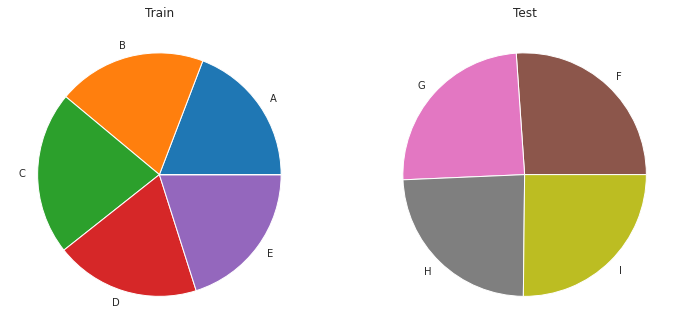

In [12]:
plot_and_display_compare_valuecounts(train_df, test_df, "product_code", True)

,attribute_0,train_value_count,train_percentage,test_value_count,test_percentage
0,material_5,5250,19.759127,10529,50.681107
1,material_7,21320,80.240873,10246,49.318893


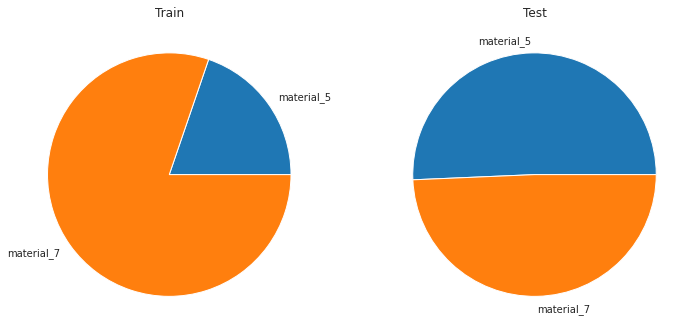

In [13]:
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_0", True)

,attribute_1,train_value_count,train_percentage,test_value_count,test_percentage
0,material_5,10362.0,38.998871,5228.0,25.164862
1,material_6,5343.0,20.109146,10529.0,50.681107
2,material_8,10865.0,40.891983,NaN,NaN
3,material_7,NaN,NaN,5018.0,24.154031


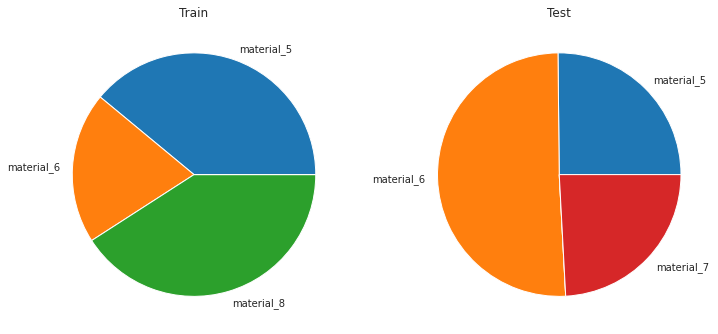

In [14]:
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_1", True)

,attribute_2,train_value_count,train_percentage,test_value_count,test_percentage
0,5,5765.0,21.697403,NaN,NaN
1,6,10455.0,39.348890,5422.0,26.098676
2,8,5250.0,19.759127,NaN,NaN
3,9,5100.0,19.194580,10335.0,49.747292
4,7,NaN,NaN,5018.0,24.154031


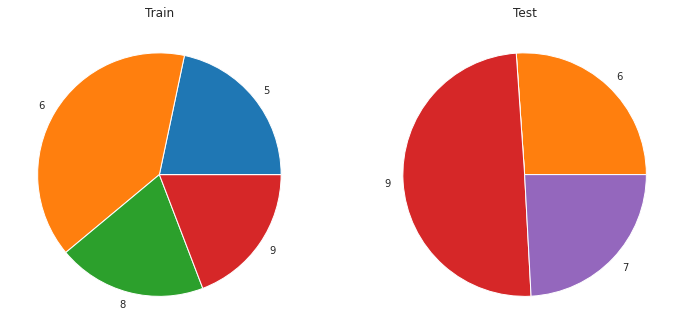

In [15]:
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_2", True)

,attribute_3,train_value_count,train_percentage,test_value_count,test_percentage
0,5,5100.0,19.194580,5228.0,25.164862
1,6,5112.0,19.239744,NaN,NaN
2,8,11015.0,41.456530,NaN,NaN
3,9,5343.0,20.109146,5018.0,24.154031
4,4,NaN,NaN,5422.0,26.098676
5,7,NaN,NaN,5107.0,24.582431


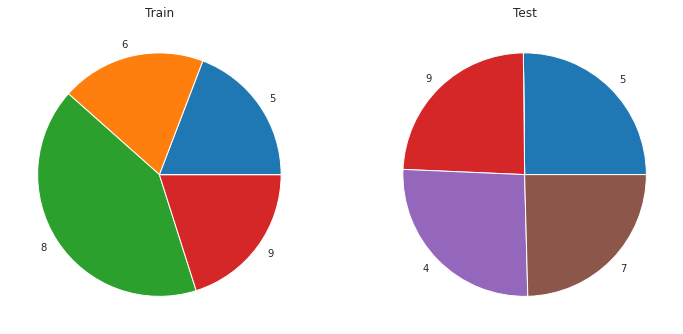

In [16]:
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_3", True)

In [17]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].nunique()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,1,1,1,1
B,1,1,1,1
C,1,1,1,1
D,1,1,1,1
E,1,1,1,1
F,1,1,1,1
G,1,1,1,1
H,1,1,1,1
I,1,1,1,1


In [18]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].first()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,material_7,material_8,9,5
B,material_5,material_5,8,8
C,material_7,material_8,5,8
D,material_7,material_5,6,6
E,material_7,material_6,6,9
F,material_5,material_6,6,4
G,material_5,material_6,9,7
H,material_7,material_7,7,9
I,material_7,material_5,9,5


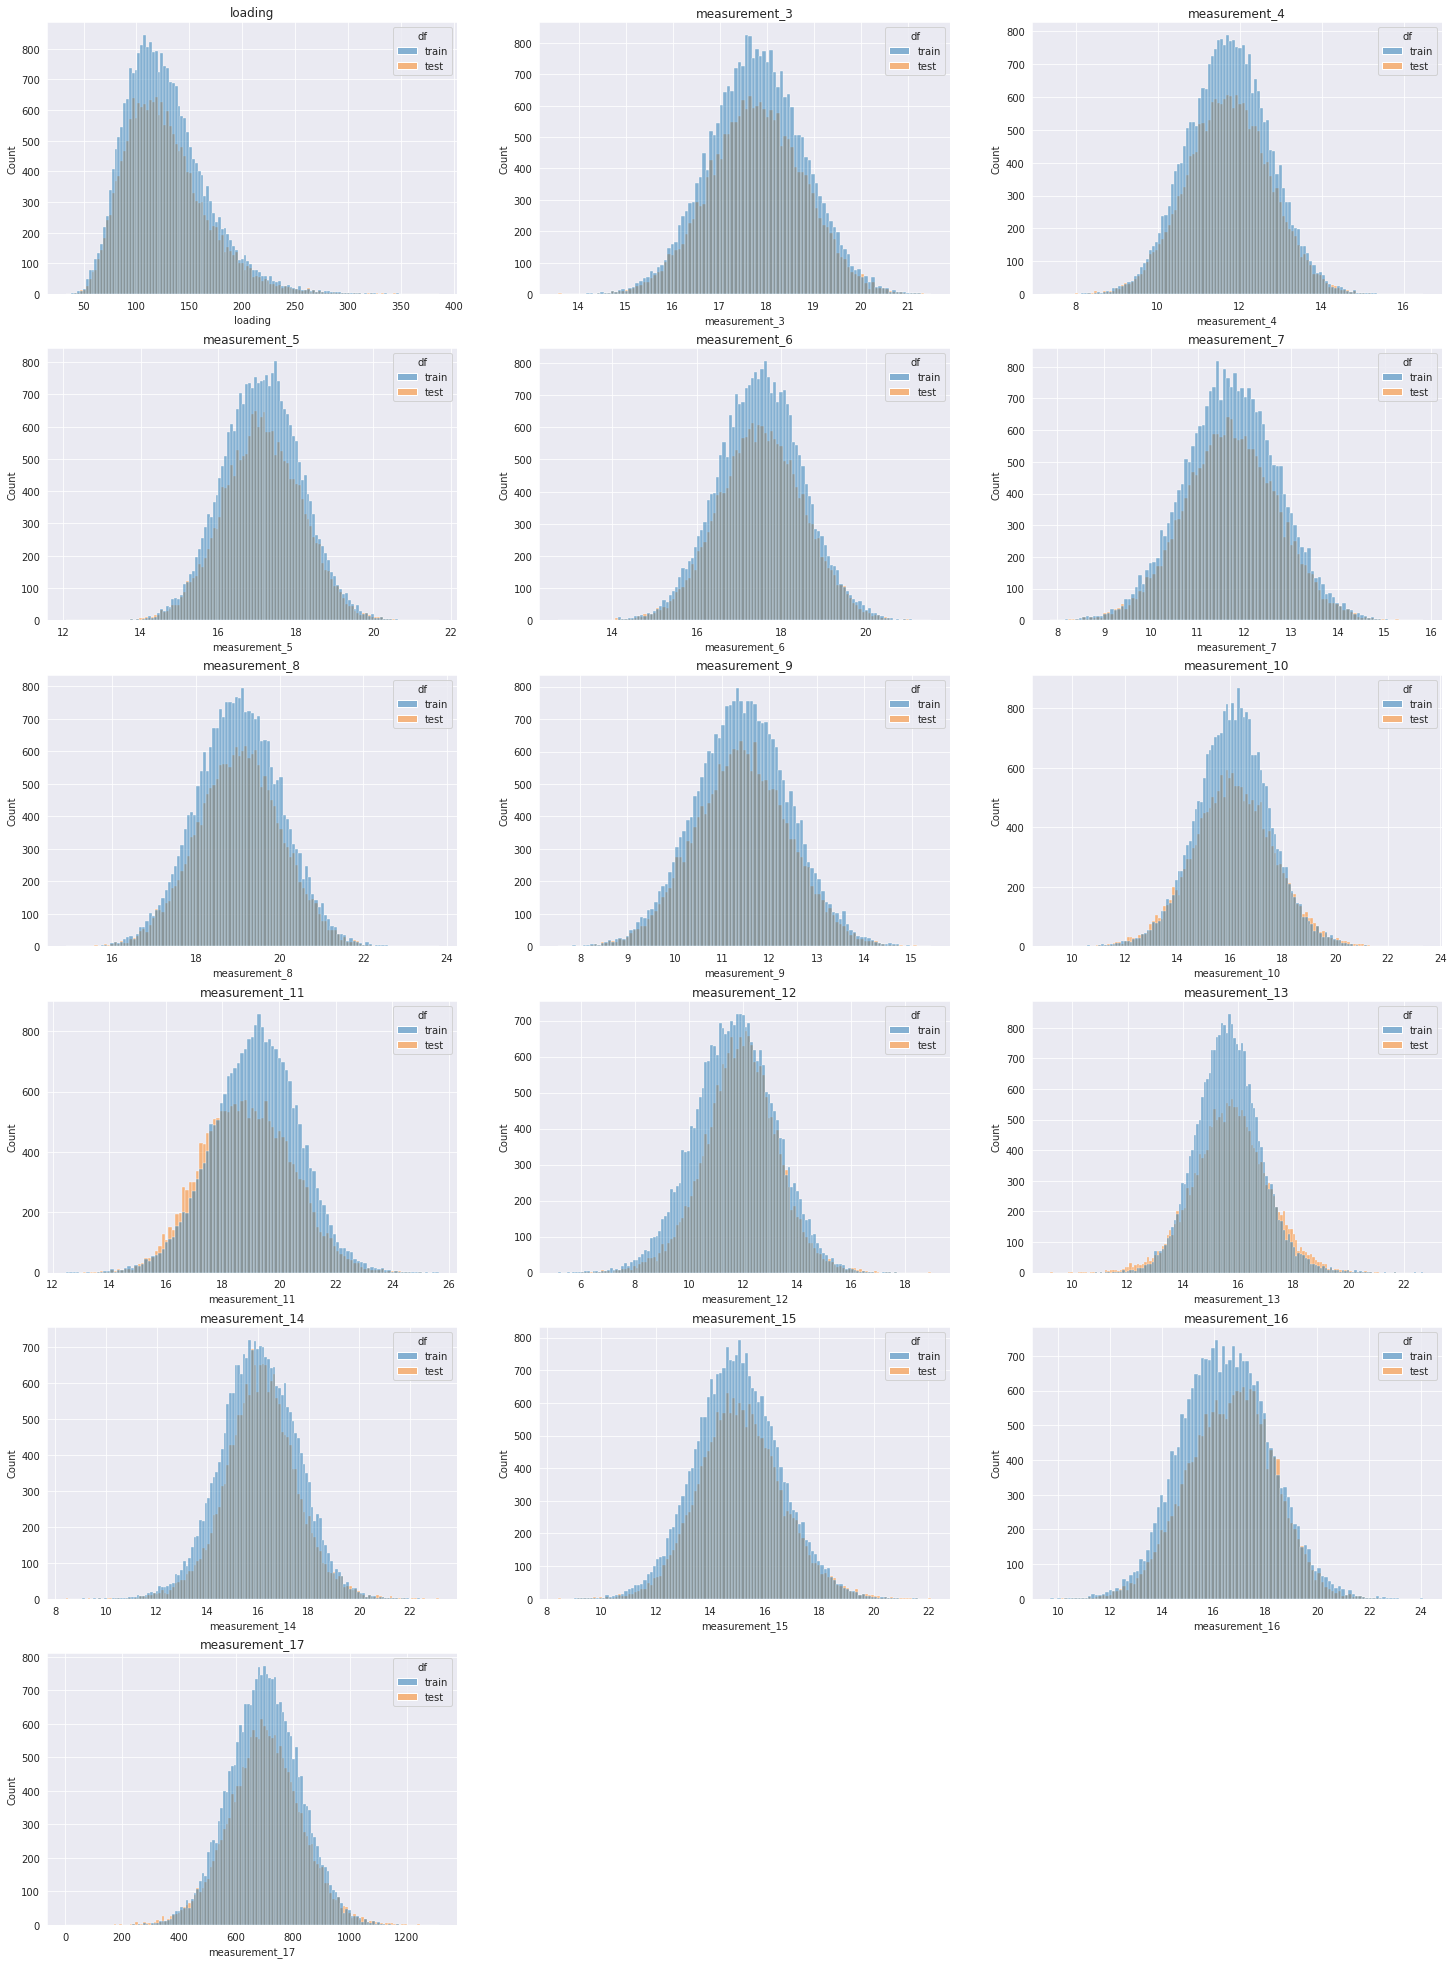

In [19]:
plt.subplots(figsize=(25,35))
train_df["df"] = "train"
test_df["df"] = "test"
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=pd.concat([train_df, test_df]).reset_index(drop=True), x=column,hue="df")
    plt.title(column)

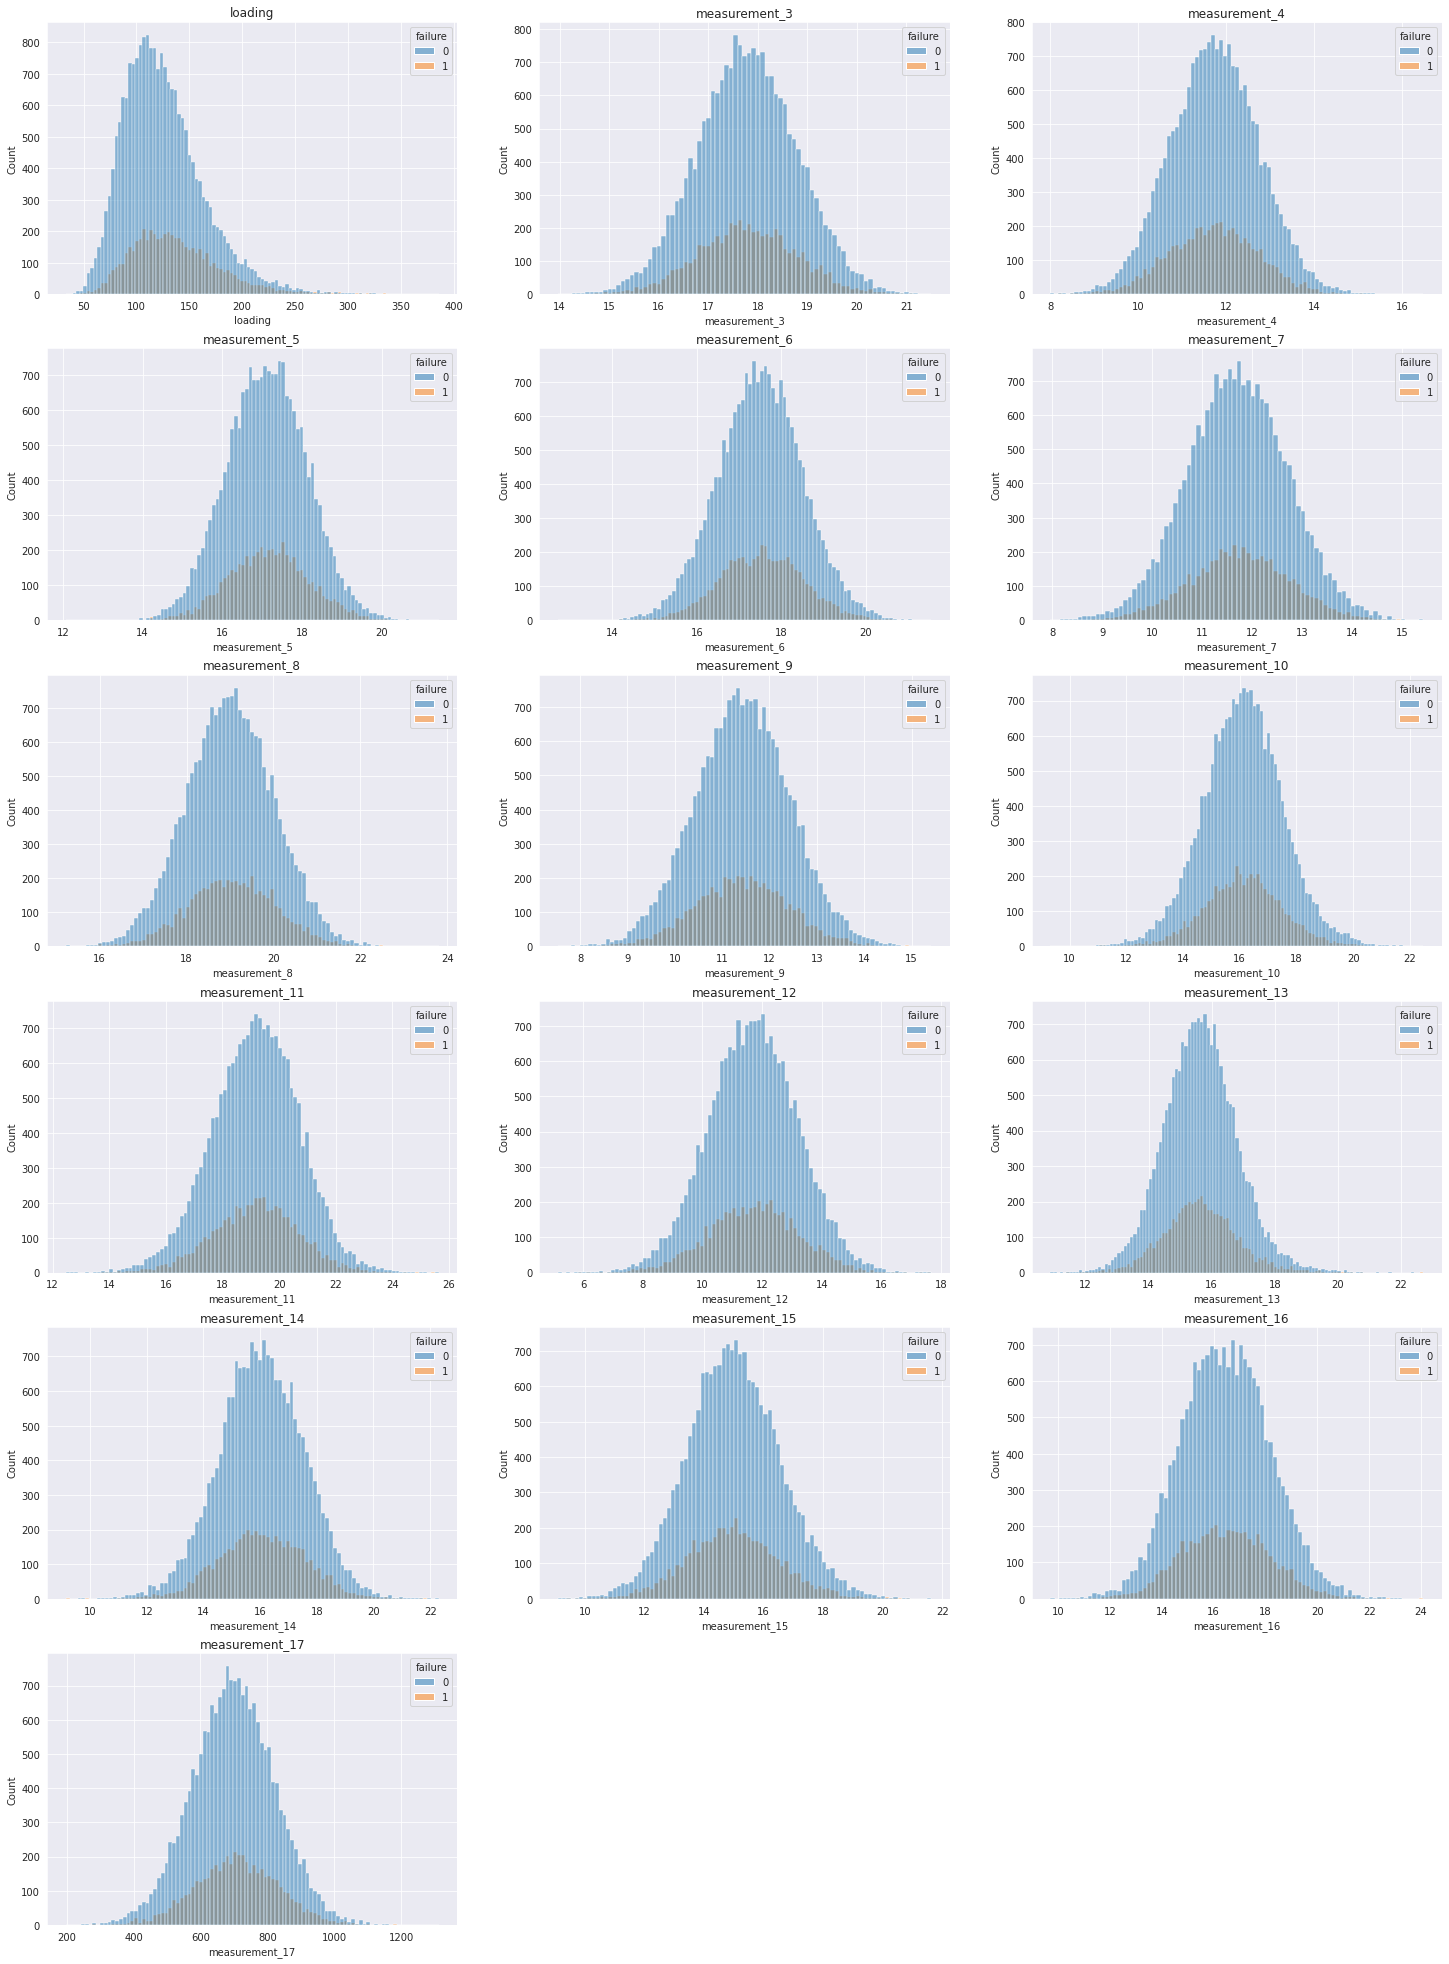

In [20]:
plt.subplots(figsize=(25,35))
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=train_df, x=column, hue="failure")
    plt.title(column)

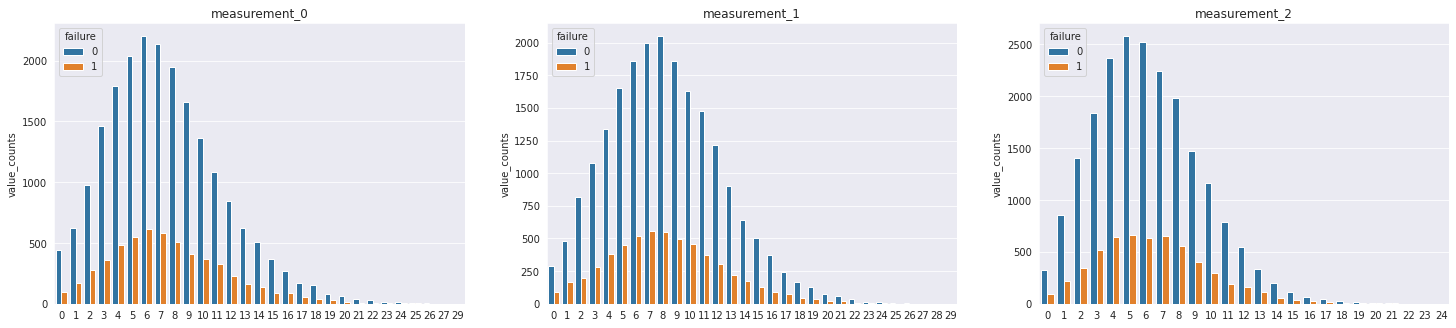

In [21]:
plt.subplots(figsize=(25,30))
for i, column in enumerate(measurement_int_cols):
    val_count = train_df[[column,"failure"]].value_counts().rename("value_counts").reset_index()
    plt.subplot(5,3,i+1)
    ax = sns.barplot(data = val_count, x=column, y="value_counts", hue="failure")
    ax.set_xlabel(None)
    plt.title(column)

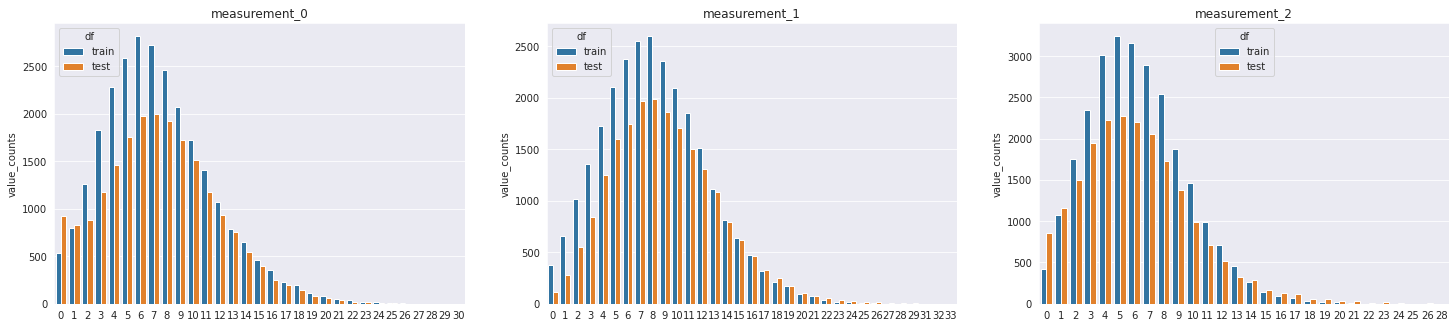

In [22]:
plt.subplots(figsize=(25,30))
for i, column in enumerate(measurement_int_cols):
    val_count = pd.concat([train_df, test_df])[[column,"df"]].value_counts().rename("value_counts").reset_index()
    plt.subplot(5,3,i+1)
    ax = sns.barplot(data = val_count, x=column, y="value_counts", hue="df")
    ax.set_xlabel(None)
    plt.title(column)

<AxesSubplot:>

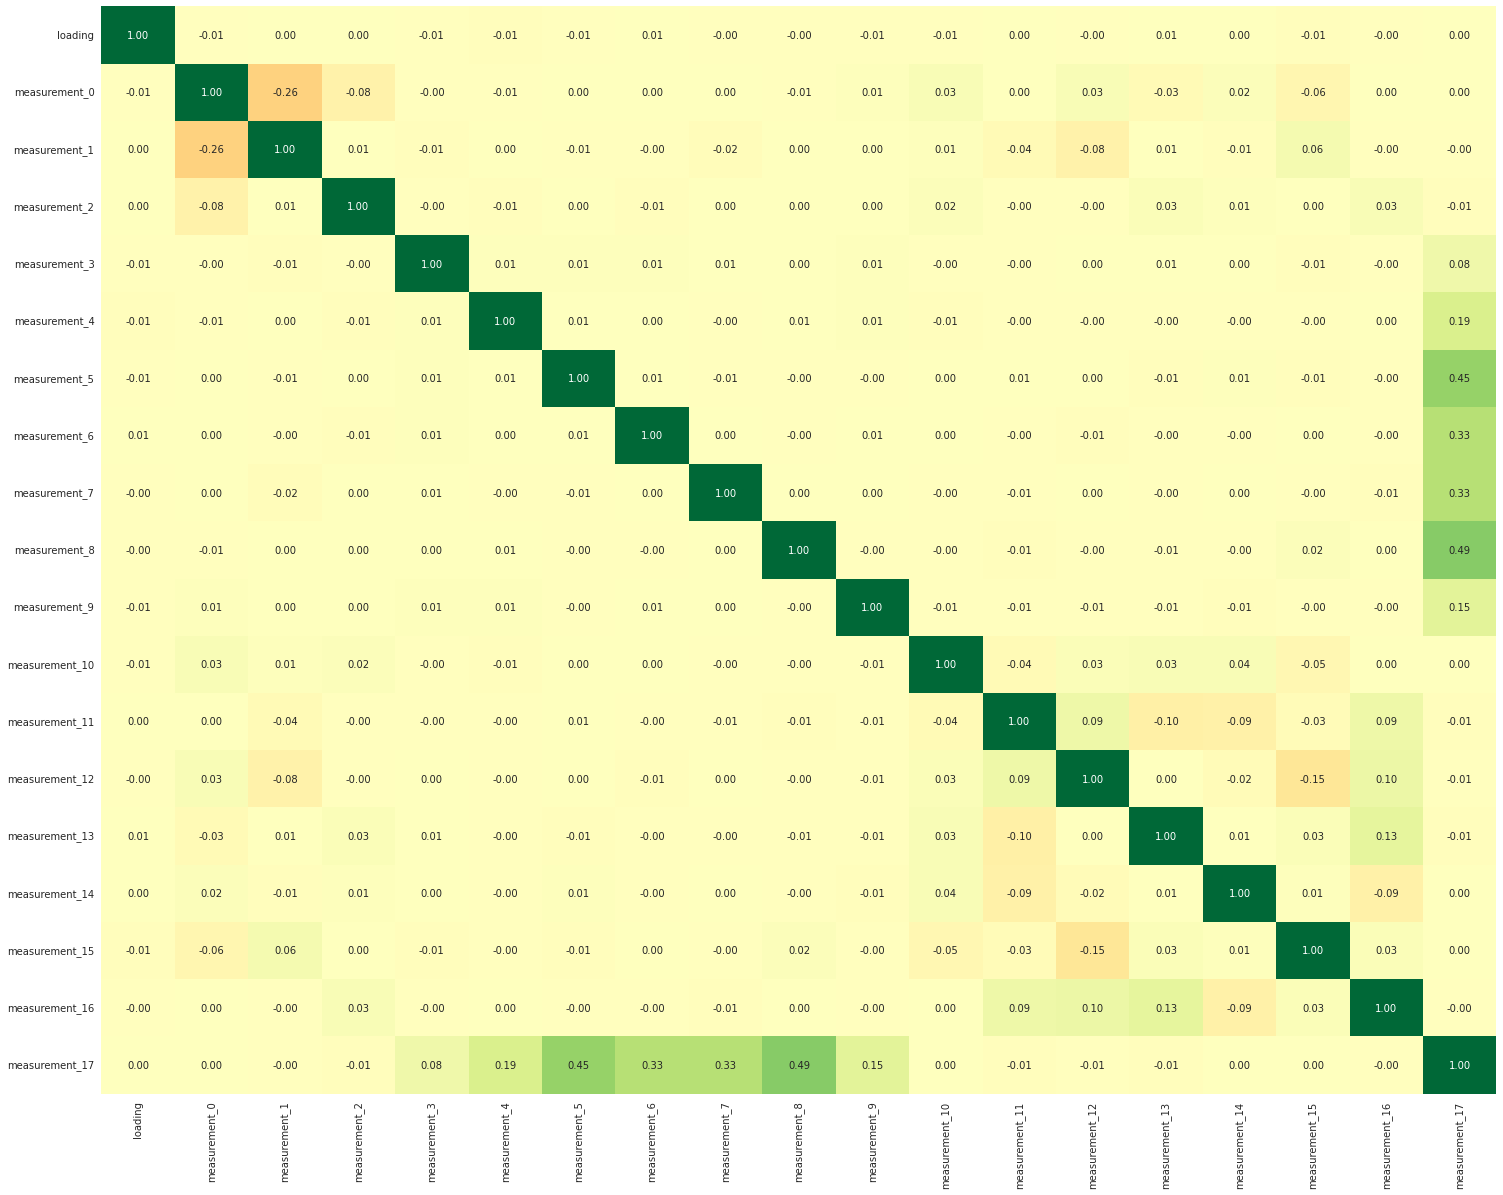

In [23]:
plt.subplots(figsize=(25,20))
sns.heatmap(train_df[["loading"] + measurement_cols].corr(),annot=True, cmap="RdYlGn", fmt = '0.2f', vmin=-1, vmax=1, cbar=False)

In [24]:
X = train_df.drop(columns=["id","failure","product_code","df"]+attribute_cols).dropna()
y = train_df.loc[X.index, "failure"]

In [25]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, X.dtypes == int)

<AxesSubplot:>

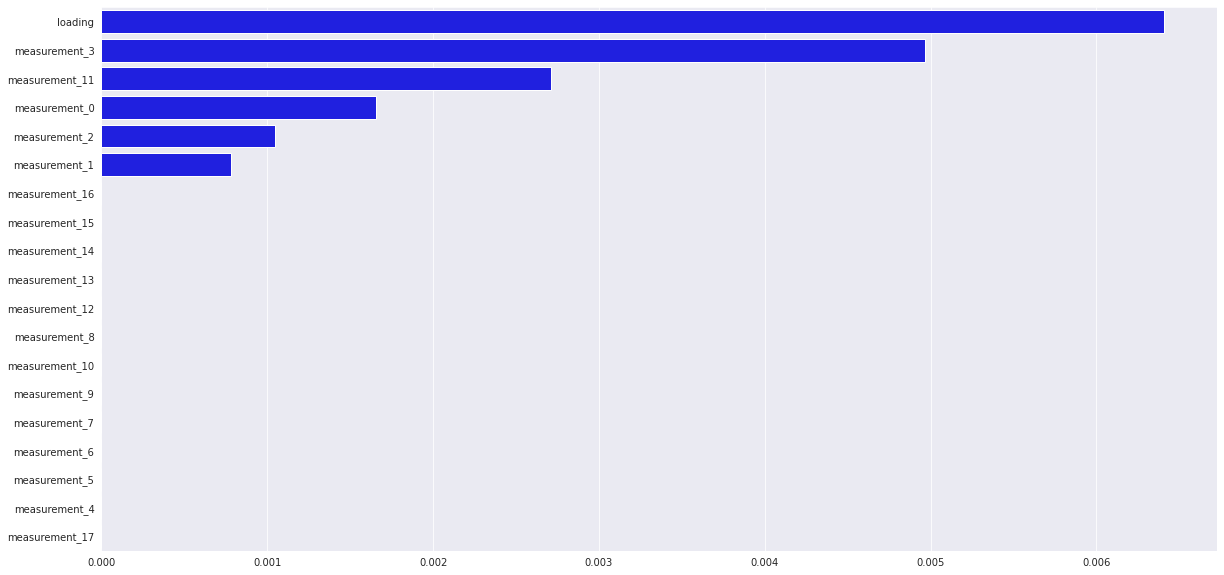

In [26]:
f,ax = plt.subplots(figsize=(20,10))
sns.barplot(y=mi_scores.index, x=mi_scores.values, color="blue")

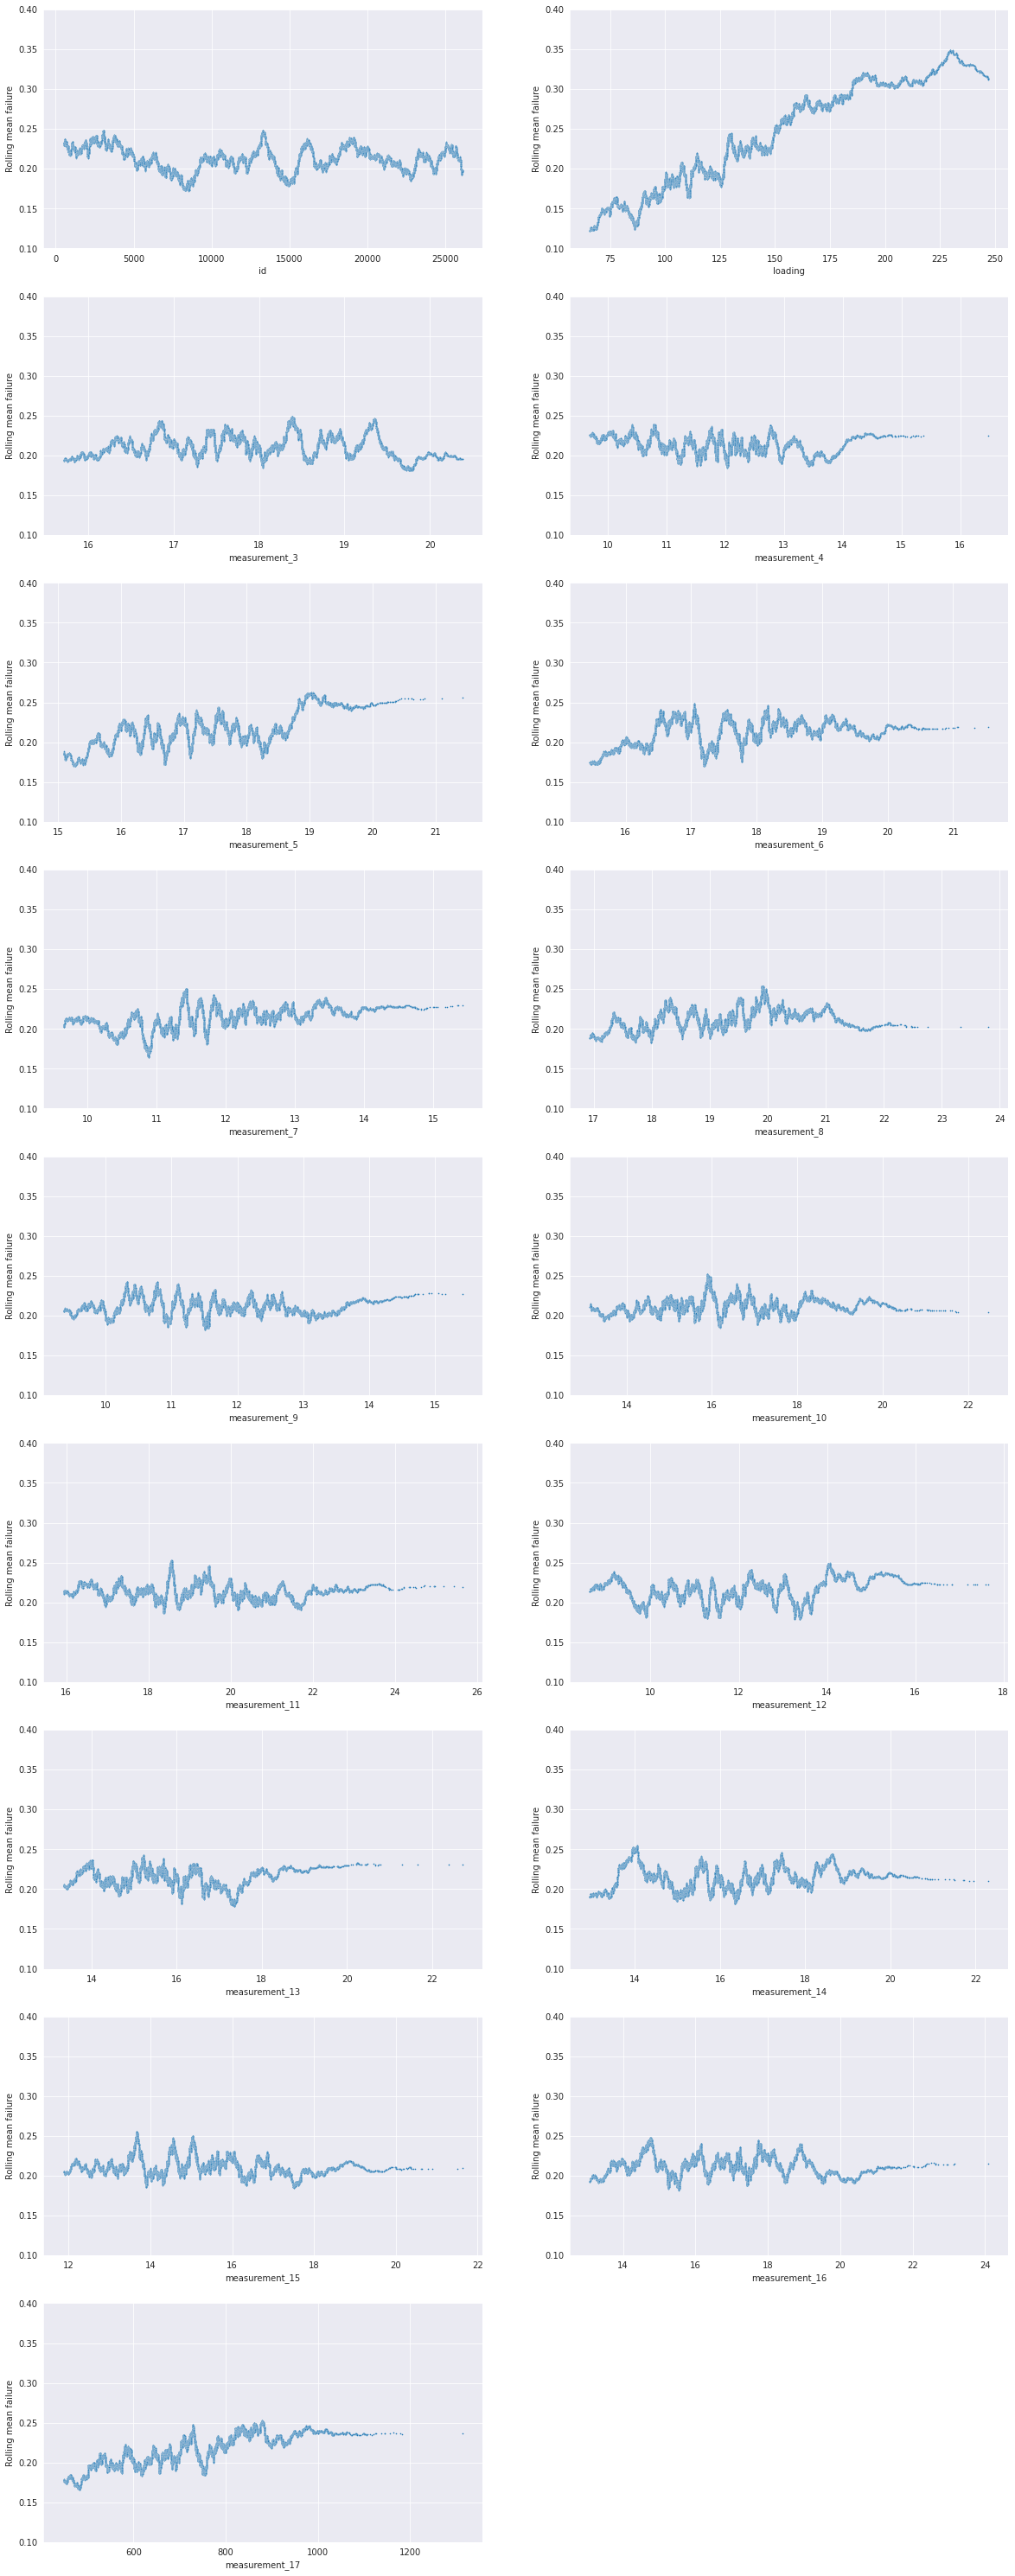

In [27]:
f,ax = plt.subplots(figsize = (20,60))
for n, col in enumerate(["id"]+measurement_float_cols):
    temp_df = pd.DataFrame({col: train_df[col].values, "target":train_df["failure"]})
    temp_df = temp_df.sort_values(col).reset_index(drop=True)
    temp_df["rolling_mean"] = temp_df["target"].rolling(1000, center=True).mean()
    
    ax = plt.subplot(10,2,n+1)
    sns.scatterplot(data=temp_df,x=col,y="rolling_mean",s=3)
    ax.set_ylim([0.1,0.4])
    ax.set_ylabel("Rolling mean failure")

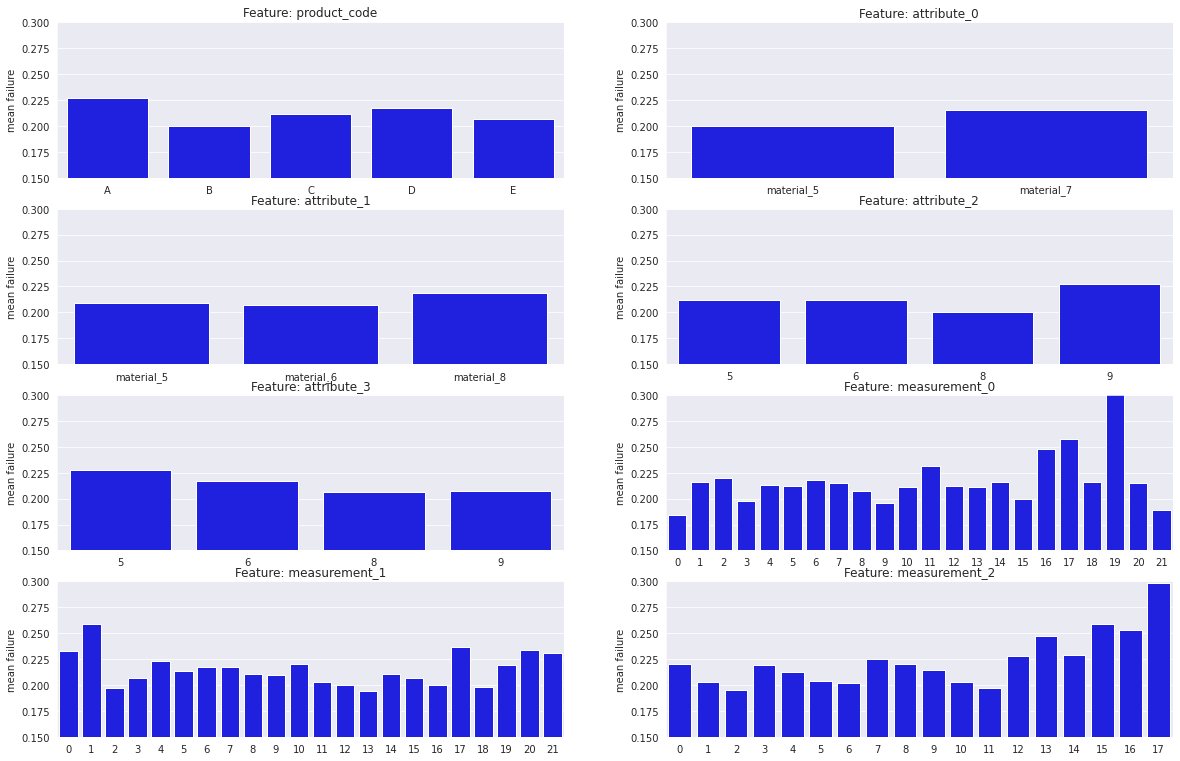

In [28]:
f,ax = plt.subplots(figsize=(20,20))
for i, column in enumerate( ["product_code"] + attribute_cols + measurement_int_cols):
    temp_df = train_df.groupby([column])["failure"].mean()
    temp_df_2 = train_df[column].value_counts()
    temp_df = temp_df[temp_df_2 > 50]
    plt.subplot(6,2,i+1)
    ax = sns.barplot(x=temp_df.index, y=temp_df.values, color="blue")
    ax.set_ylim([0.15,0.3])
    plt.ylabel("mean failure")
    plt.xlabel(None)
    plt.title("Feature: " + column)

In [29]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [30]:
train_df = train_df.drop(columns=["id","df"])
test_df = test_df.drop(columns=["id","df"])

In [31]:
X = train_df.drop(columns="failure")
y = train_df["failure"]

X_test = test_df

In [32]:
def _scale(train_data, val_data):
    scaler = PowerTransformer()
    
    scaled_train = scaler.fit_transform(train_data[measurement_cols + ["loading"]])
    scaled_val = scaler.transform(val_data[measurement_cols + ["loading"]])
    
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = scaled_train
    new_val[measurement_cols + ["loading"]] = scaled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [33]:
def _impute(train_data, val_data):
    imputer = SimpleImputer(strategy="mean")
    imputer.fit(train_data[measurement_cols + ["loading"]])
    
    filled_train = imputer.transform(train_data[measurement_cols + ["loading"]])
    filled_val = imputer.transform(val_data[measurement_cols + ["loading"]])
    
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = filled_train
    new_val[measurement_cols + ["loading"]] = filled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [34]:
def _ohe(train_data, val_data):
    new_train = pd.get_dummies(train_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    new_val = pd.get_dummies(val_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    
    train_val = pd.concat([new_train, new_val]).fillna(0)
    
    new_train = train_val.iloc[0:len(train_data)]
    new_val = train_val.iloc[len(train_data):]
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [35]:
def k_fold_cv(model,X,y):
    kfold = GroupKFold(n_splits=5)

    feature_imp, y_pred_list, y_true_list, acc_list, roc_list  = [],[],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y, train_df["product_code"])):
        print("==fold==", fold)
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
            
        X_train, X_val = _impute(X_train, X_val)
            
        X_train, X_val = _scale(X_train, X_val)
            
        X_train, X_val = _ohe(X_train, X_val)
            
        model.fit(X_train,y_train)
            
        y_pred = model.predict_proba(X_val)[:,1]
            
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)
        
        roc_list.append(roc_auc_score(y_val,y_pred))
        acc_list.append(accuracy_score(y_pred.round(), y_val))
        print("roc auc", roc_auc_score(y_val,y_pred))
        print('Acc', accuracy_score(y_pred.round(), y_val))
            
        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError:
            pass
    return feature_imp, y_pred_list, y_true_list, acc_list, roc_list, X_val, y_val

In [36]:
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.8, C=0.007, tol = 1e-2, solver='saga', max_iter=1000, random_state=5)

In [37]:
%%time
feature_imp, y_pred_list, y_true_list, acc_list, roc_list, X_val, y_val = k_fold_cv(model=model,X=X,y=y)

==fold== 0
roc auc 0.5861256289563382
Acc 0.7883781439722463
==fold== 1
roc auc 0.5807657163001732
Acc 0.7930001871607711
==fold== 2
roc auc 0.5885110508897048
Acc 0.7996190476190477
==fold== 3
roc auc 0.5951400629496403
Acc 0.7824726134585289
==fold== 4
roc auc 0.5957795516657585
Acc 0.7727450980392156
CPU times: user 3.11 s, sys: 3.53 s, total: 6.64 s
Wall time: 2.49 s


In [38]:
print("Mean accuracy Score:", np.mean(acc_list))
print("Mean ROC AUC Score:", np.mean(roc_list))

Mean accuracy Score: 0.7872430180499619
Mean ROC AUC Score: 0.589264402152323


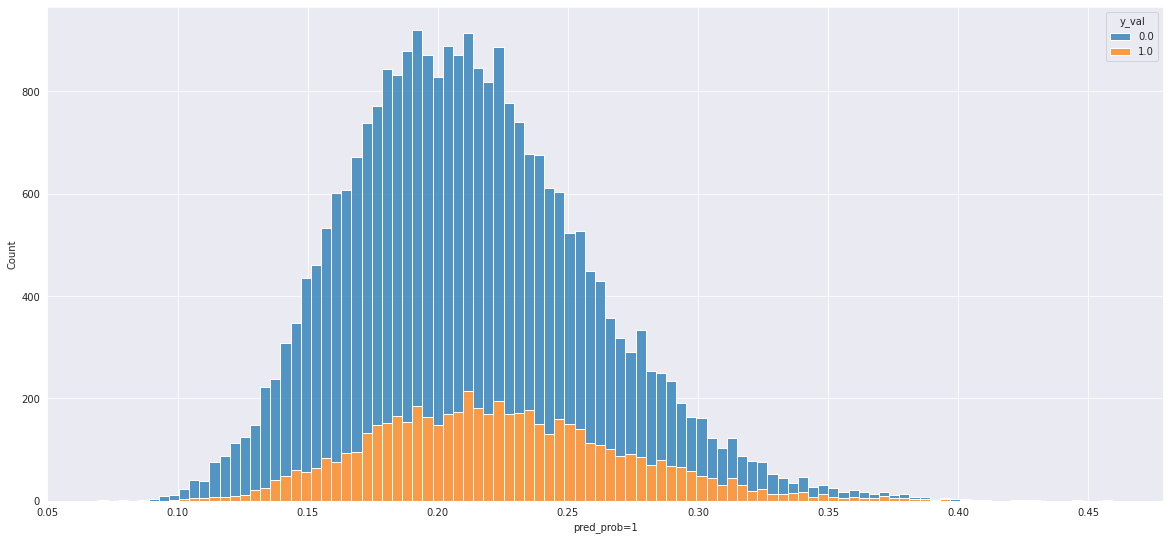

In [39]:
val_preds = pd.DataFrame({"pred_prob=1":y_pred_list, "y_val":y_true_list})
f,ax = plt.subplots(figsize=(20,20))
plt.subplot(2,1,1)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", multiple="stack", bins = 100)

In [40]:
def inference(X, X_test, iterations):
    pred_list = []
    for i in range(iterations):
        X_train = X.sample(int(0.8*len(X)))
        y_train = y.loc[X_train.index]

        X_train, X_te = _impute(X_train, X_test)

        X_train, X_te = _scale(X_train, X_te)

        X_train, X_te = _ohe(X_train, X_te)
        
        model = LogisticRegression(penalty='elasticnet', l1_ratio=0.8, C=0.007, tol = 1e-2, solver='saga', max_iter=1000, random_state=i)
        model.fit(X_train,y_train)

        y_pred = model.predict_proba(X_te)[:,1]
        
        pred_list.append(y_pred)
    
    pred_df = pd.DataFrame(pred_list).T
    pred_df = pred_df.rank()
    pred_df["mean"] = pred_df.mean(axis=1)
    
    return pred_df

In [41]:
#! %%time
predictions_df = inference(X, X_test, 200)

CPU times: user 2min 23s, sys: 3min 1s, total: 5min 24s
Wall time: 1min 53s


In [42]:
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,mean
0,9216.0,9020.0,9081.0,9095.0,9020.0,8820.0,8996.0,9016.0,8981.0,8973.0,...,9389.0,9275.0,9105.0,9289.0,9110.0,9054.0,8934.0,8886.0,8948.0,9077.280
1,6291.0,6667.0,6723.0,6706.0,6638.0,5864.0,5890.0,6816.0,6603.0,5936.0,...,6290.0,6203.0,7016.0,6182.0,6280.0,6917.0,6029.0,5925.0,5302.0,6400.560
2,7622.0,7564.0,7710.0,7684.0,7633.0,7440.0,7431.0,7622.0,7585.0,7320.0,...,7741.0,7654.0,7667.0,7712.0,7526.0,7637.0,7447.0,7458.0,7496.0,7580.380
3,7605.0,7222.0,7237.0,7292.0,7082.0,7054.0,7549.0,7175.0,7141.0,7348.0,...,7549.0,7626.0,7317.0,7705.0,7284.0,7233.0,7248.0,7106.0,7478.0,7238.195
4,20260.0,20154.0,20203.0,20166.0,20161.0,20225.0,20214.0,20155.0,20175.0,20180.0,...,20161.0,20175.0,20138.0,20082.0,20159.0,20147.0,20195.0,20211.0,20303.0,20173.320


In [43]:
sub_df = pd.read_csv("../tabular-playground-series-aug-2022/sample_submission.csv")
sub_df["failure"] = predictions_df["mean"]
sub_df

,id,failure
0,26570,9077.280
1,26571,6400.560
2,26572,7580.380
3,26573,7238.195
4,26574,20173.320
...,...,...
20770,47340,14911.830
20771,47341,840.770
20772,47342,633.650
20773,47343,12005.840
